# CNN classification based on fruits dataset

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Dataset

In [8]:
img_height,img_width=32,32
batchSize=20 
train_dataset=tf.keras.utils.image_dataset_from_directory("fruits/train",image_size=(img_height,img_width),batch_size=batchSize)

validation_dataset=tf.keras.utils.image_dataset_from_directory("fruits/validation",image_size=(img_height,img_width),batch_size=batchSize)

test_dataset=tf.keras.utils.image_dataset_from_directory("fruits/test",image_size=(img_height,img_width),batch_size=batchSize)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


## Step 2: visualisation des donnees

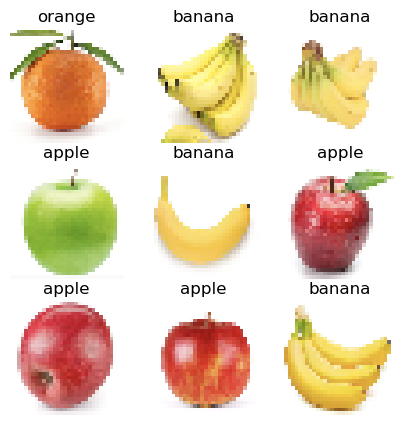

In [11]:
class_names=['apple','banana','orange']
plt.figure(figsize=(5,5))
for img,label in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")
    plt.show()

## Step 3: Creation du modele

In [14]:
modelCNN=tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(3,activation='softmax'),
    ]
)

## Step4: parametrages du modele

In [17]:
modelCNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Step 5: Training

In [20]:
modelCNN.fit(train_dataset,validation_data=validation_dataset,epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5374 - loss: 1.0060 - val_accuracy: 0.7727 - val_loss: 0.5727
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8042 - loss: 0.4888 - val_accuracy: 0.8636 - val_loss: 0.3130
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8654 - loss: 0.3146 - val_accuracy: 0.8333 - val_loss: 0.3917
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8920 - loss: 0.3008 - val_accuracy: 0.9091 - val_loss: 0.2021
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9213 - loss: 0.2141 - val_accuracy: 0.9697 - val_loss: 0.1269
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9383 - loss: 0.1541 - val_accuracy: 0.8939 - val_loss: 0.2427
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9623 - loss: 0.1329 - val_accuracy: 0.9242 - val_loss: 0.1884
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9859 - loss: 0.0808 - val_accuracy: 0.9394 - val_

In [22]:
modelCNN.evaluate(test_dataset,verbose=2)

7/7 - 0s - 41ms/step - accuracy: 0.9538 - loss: 0.1790


[0.178965225815773, 0.9538461565971375]

In [26]:
modelCNN.save("fruits_model.h5")